In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import HuberRegressor


In [41]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [43]:
X = tips[['total_bill']]

In [44]:
y = tips[['tip']]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [47]:
# Fit with Linear Regression algorithm
model = LinearRegression()

In [48]:
model.fit(X_train,y_train)

LinearRegression()

R2: 0.5218930802613073
MAE: 0.8247991854002368
MSE: 1.2827609851358606
RootMSE: 1.1325903871814649
coefficient:  [[0.0895594]]


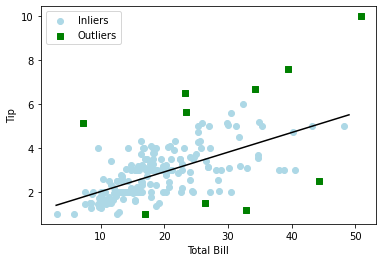

In [77]:
ransacReg1= RANSACRegressor(LinearRegression(),residual_threshold=2,random_state=0)
ransacReg1.fit(X_train, y_train)
inlier=ransacReg1.inlier_mask_
outlier=np.logical_not(inlier)
line_X=np.arange(3,51,2)
line_y=ransacReg1.predict(line_X[:,np.newaxis])
plt.scatter(X_train[inlier],y_train[inlier],c='lightblue',marker='o',label='Inliers')
plt.scatter(X_train[outlier],y_train[outlier],c='green',marker='s',label='Outliers')
plt.plot(line_X,line_y,color='black')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(loc='upper left')
y_pred = ransacReg1.predict(X_test)
r_squared = r2_score(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print("R2:",r_squared)
print("MAE:",mae)
print("MSE:",mse)
print("RootMSE:",np.sqrt(mse))
print("coefficient: ",ransacReg1.estimator_.coef_)


In [54]:
ransac.fit(X_train,y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [19]:
model.coef_

array([[0.09673153]])

In [20]:
model.intercept_

array([1.034947])

In [21]:
y_pred = model.predict(X_test)

In [22]:
r_squared = r2_score(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)

In [23]:
print("R2:",r_squared)
print("MAE:",mae)
print("MSE:",mse)
print("RootMSE:",np.sqrt(mse))

R2: 0.5526523070844245
MAE: 0.7905106615177849
MSE: 1.2002339718828332
RootMSE: 1.0955519028703447


In [24]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'tip')

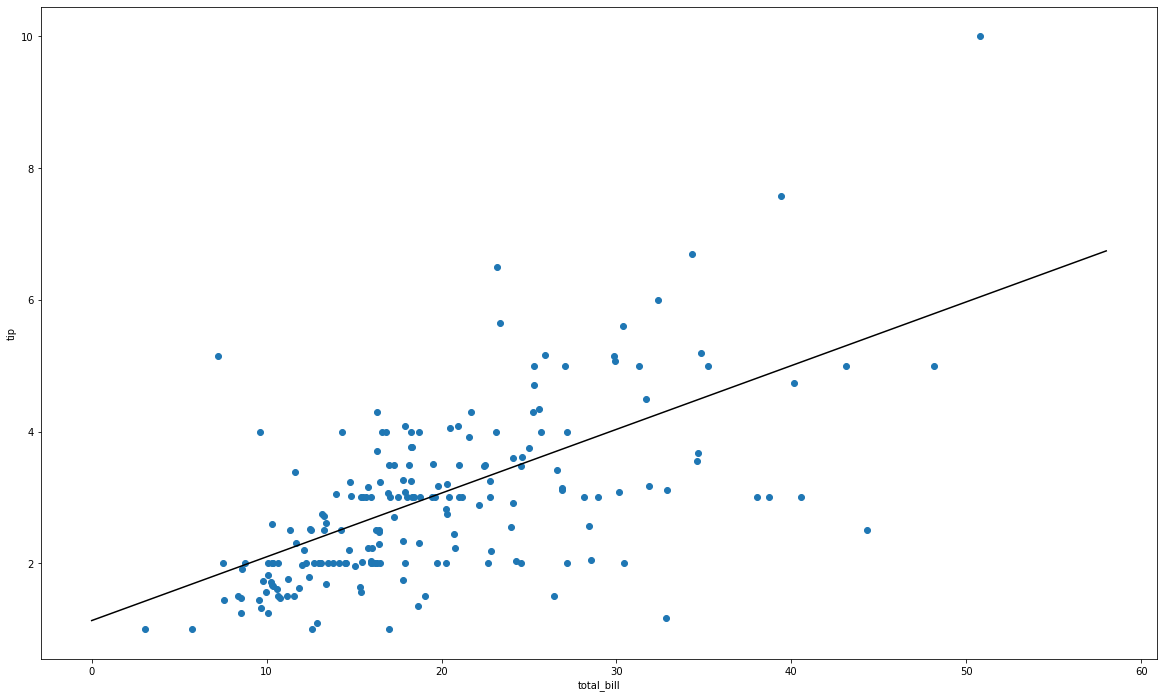

In [25]:


y_plot = []

for i in range(1,60):
    y_plot.append(float(model.intercept_)+float(model.coef_)*i)
    
plt.figure(figsize=(20,12))
plt.scatter(x=X_train,y=y_train);
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')

plt.xlabel("total_bill")
plt.ylabel("tip")


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

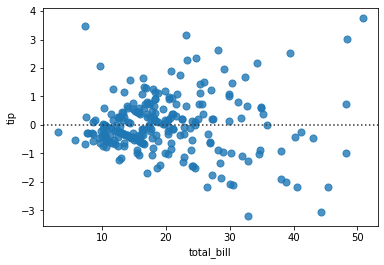

In [27]:
sns.residplot(x='total_bill', y='tip', data=tips, scatter_kws=dict(s=50))

In [28]:
model.coef_

array([[0.09673153]])

In [29]:
float(model.intercept_)

1.03494700375791

In [30]:
n = len(y_test)

In [31]:
sse = np.sum((y_pred-y_test)**2)

In [32]:
n

49

In [33]:
s = sse/(n-2)

In [34]:
s

tip    1.251308
dtype: float64